In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy

# Loading Adjacency Matrix

In [2]:
adj_matrix = scipy.sparse.load_npz("example_adjacency_matrix.npz")

In [3]:
# How many vertices does this graph have?
n_nodes = # Fill in
# How many edges does this graph have?
n_edges = # Fill in

# Search up SIR Dynamics and Explain Below

SIR dynamics are ...

# Functions for SIR Infection Dynamics

In [4]:
def seed_infected_vector(n,p):
    return np.random.binomial(np.ones(n).astype(int),p)

def iterate(adj_matrix, infected_vector, recovery_vector, infection_prob=0, recovery_prob = 0):
    # New additions
    infect_vector = (infected_vector-recovery_vector)
    infect_vector = infect_vector + infection_prob*adj_matrix.dot(infect_vector)*(1-recovery_vector)
    infect_vector = _flip(infect_vector)
    infect_vector = infect_vector + recovery_vector
    
    # Recoveries
    rec_vector = recovery_prob*np.ones(len(infected_vector))
    rec_vector = _flip(rec_vector)*(infected_vector-recovery_vector)
    rec_vector = recovery_vector+rec_vector
    
    return infect_vector, rec_vector
    
def _flip(prob_vector):
    flips = np.random.rand(len(prob_vector))
    return np.array(prob_vector>flips).astype(int)

def simulate(seed_prob, n_nodes, infection_prob=0.1, recovery_prob=0.05, time_horizon=100, seed=0):
    np.random.seed(seed)
    infected_vector = seed_infected_vector(n_nodes, seed_prob)
    recovery_vector = np.zeros(n_nodes).astype(int)

    infected = []
    recovery = []
    
    for i in range(time_horizon):
        infected.append(infected_vector)
        recovery.append(recovery_vector)

        infected_vector, recovery_vector = iterate(adj_matrix, 
                                                  infected_vector,
                                                  recovery_vector,
                                                  infection_prob=infection_prob,
                                                  recovery_prob = recovery_prob)
    
    num_infected = [i.sum() for i in infected]
    num_recovery = [i.sum() for i in recovery]
    num_susceptible = [n_nodes-num_infected[i] for i in range(time_horizon)]
    
    return num_infected, num_recovery, num_susceptible, infected, recovery

In [5]:
seed_prob = 0.01
infection_prob = 0.1
recover_prob = 0.01

num_infected, num_recovery, num_susceptible, infected, recovery = simulate(0.01, 
                                                                           n_nodes,
                                                                           infection_prob=infection_prob,
                                                                           recovery_prob=recover_prob)

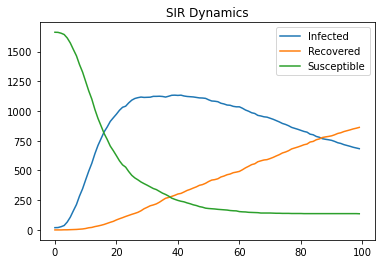

In [6]:
plt.title("SIR Dynamics")
plt.plot(np.array(num_infected)-np.array(num_recovery), label="Infected")
plt.plot(num_recovery, label="Recovered")
plt.plot(num_susceptible, label="Susceptible")
plt.legend()

#  Graph Embedding of Infected and Non-Infected Nodes

<img src="contagion_embedding.png">

The yellow points represent infected members of the network while the purple represent the non-infected members of the network.